# Starbucks review sentiment analysis

This dataset is a Starbucks Reviews Dataset with Ratings and Images web scrapped from ConsumerAffairs website.

Dataset link: https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset/

In [1]:
# lets start by importing the necessary libraries

import numpy as np
import pandas as pd
import textblob

# lets load the data
reviewsData = pd.read_csv('starbucks_reviews_data.csv')

reviewsData.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


## Performing EDA

In [2]:
# checking for any missing values

reviewsData.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review           0
Image_Links      0
dtype: int64

We have 145 rows without rating. So, we will remove these rows from our dataset.

In [3]:
# removing missing values

reviewsData = reviewsData.dropna()

In [4]:
# checking for any duplicates

reviewsData.duplicated().sum()

0

No duplicates. Awesome, let's move forward.

In [5]:
# checking the first 100 rows of the data

reviewsData.head(100)

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
95,Savaa,"Trenton, NJ","Reviewed Dec. 25, 2021",1.0,I got a Starbucks gift card and ordered a coff...,['No Images']
96,Izzy,"Louisville, KY","Reviewed Dec. 22, 2021",5.0,Incredible experience every time. Thankful for...,['No Images']
97,Spiros,"Allentown, PA","Reviewed Nov. 30, 2021",1.0,"Despite customer traffic being slow, I had to ...",['No Images']
98,Ayako,"Denver, CO","Reviewed Nov. 28, 2021",1.0,Corporate here in Denver Colorado HONESTLY DO ...,['https://media.consumeraffairs.com/files/cach...


On close inspection of the data, we can see that we do not need the 'Image_links' column, as well as the names, which are irrelavent for our analysis. We will drop these columns.

In [6]:
# removing image column as it is not needed for our analysis

reviewsData = reviewsData.drop(['Image_Links', 'name'], axis=1)

Also, the location column is having both the city and the state code. We can split the location column into two columns, one for the city and the other for the state code.

In [7]:
# splitting location column into city and state columns

reviewsData['City'] = reviewsData['location'].str.split(',').str[0]
reviewsData['State'] = reviewsData['location'].str.split(',').str[1]

In [8]:
# first removing the 'Reviewed' keyword and parsing the date column

reviewsData['Date'] = reviewsData['Date'].str.replace('Reviewed ', '', case=False)
reviewsData['Date'] = pd.to_datetime(reviewsData['Date'])

C:\Users\Techshots2\AppData\Local\Temp\ipykernel_7004\487326385.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reviewsData['Date'] = pd.to_datetime(reviewsData['Date'])


In [9]:
reviewsData.head()

,location,Date,Rating,Review,City,State
0,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...,Wichita Falls,TX
1,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...,Apopka,FL
2,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...,Cranberry Twp,PA
3,"Seattle, WA",2023-05-26,5.0,Me and my friend were at Starbucks and my card...,Seattle,WA
4,"Gresham, OR",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...,Gresham,OR


In [10]:
reviewsData.head()

,location,Date,Rating,Review,City,State
0,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...,Wichita Falls,TX
1,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...,Apopka,FL
2,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...,Cranberry Twp,PA
3,"Seattle, WA",2023-05-26,5.0,Me and my friend were at Starbucks and my card...,Seattle,WA
4,"Gresham, OR",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...,Gresham,OR


## Cleaning Reviews

In [11]:
# let's clean the review column by removing common words and punctuations

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Techshots2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Techshots2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Techshots2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
def clean_review(review):
    review = review.lower()
    review = review.translate(str.maketrans('', '', string.punctuation))
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('https?://\S+|www\.\S+', '', review)
    review = re.sub('<.*?>+', '', review)
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review)
    review = re.sub('\n', '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = [word for word in review.split(' ') if word not in stop_words]
    review = [lemmatizer.lemmatize(word) for word in review]
    return ' '.join(review)

In [13]:
# applying the clean_review function to the review column

reviewsData['Review'] = reviewsData['Review'].apply(clean_review)

In [14]:
reviewsData.head()

,location,Date,Rating,Review,City,State
0,"Wichita Falls, TX",2023-09-13,5.0,amber ladonna starbucks southwest parkway alwa...,Wichita Falls,TX
1,"Apopka, FL",2023-07-16,5.0,starbucks fire station altamonte spring fl m...,Apopka,FL
2,"Cranberry Twp, PA",2023-07-05,5.0,wanted go way recognize starbucks employee bil...,Cranberry Twp,PA
3,"Seattle, WA",2023-05-26,5.0,friend starbucks card didn’t work thankful wor...,Seattle,WA
4,"Gresham, OR",2023-01-22,5.0,i’m kick drinking cup warm water work instaca...,Gresham,OR


## Sentiment analysis using textblob

In [15]:
# lets calculate the sentiment of each review using TextBlob

def get_sentiment(review):
    analysis = textblob.TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [16]:
# generating the sentiment column

reviewsData['GeneratedSentiment'] = reviewsData['Review'].apply(get_sentiment)


In [19]:
reviewsData.head()

,location,Date,Rating,Review,City,State,GeneratedSentiment
0,"Wichita Falls, TX",2023-09-13,5.0,amber ladonna starbucks southwest parkway alwa...,Wichita Falls,TX,Positive
1,"Apopka, FL",2023-07-16,5.0,starbucks fire station altamonte spring fl m...,Apopka,FL,Positive
2,"Cranberry Twp, PA",2023-07-05,5.0,wanted go way recognize starbucks employee bil...,Cranberry Twp,PA,Negative
3,"Seattle, WA",2023-05-26,5.0,friend starbucks card didn’t work thankful wor...,Seattle,WA,Positive
4,"Gresham, OR",2023-01-22,5.0,i’m kick drinking cup warm water work instaca...,Gresham,OR,Positive


## Printing the word cloud

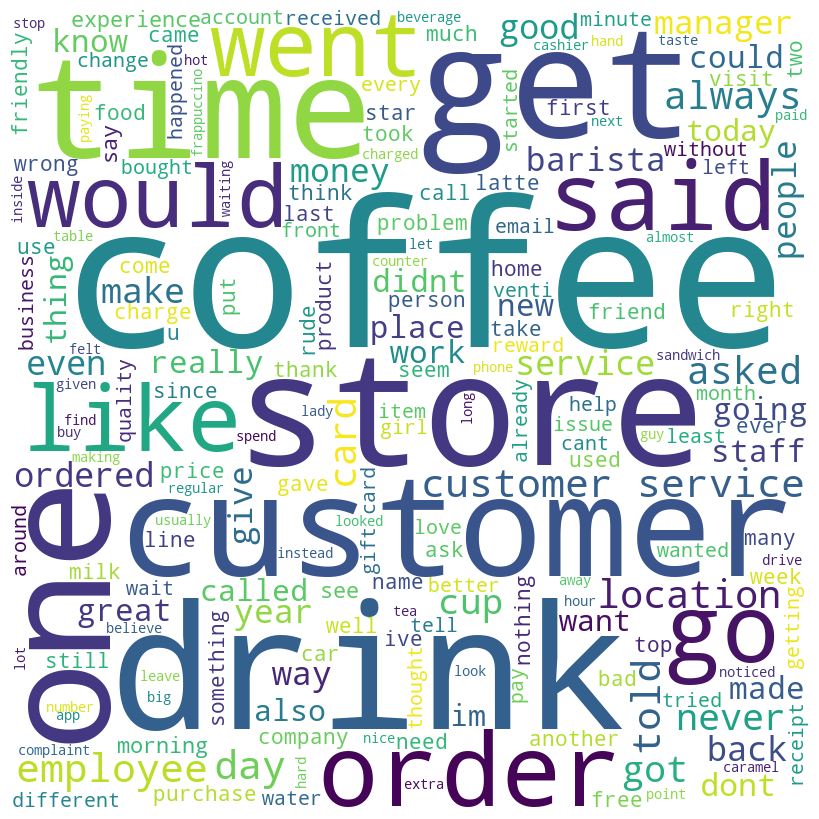

In [17]:
# printing the word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stop_words.update(["Starbucks"])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(reviewsData['Review']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Generating cleaned csv file

In [18]:
# Writing the cleaned data to a new csv file

reviewsData.to_csv('cleaned_starbucks_reviews_data.csv', index=False)